In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('netflix_titles (1).csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [16]:
df.isnull().sum()  # Check missing values

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           4
duration         3
listed_in        0
description      0
duration_mins    0
dtype: int64

In [12]:
#What it does: Replaces all NaN in the 'director' column with 'Unknown'
#Why: In many real-world datasets, if info like director or cast is missing, we either:
#Drop the row (not ideal if a lot are missing)
#Fill it with a default value to indicate "data not available"
#inplace=True: Makes the change directly in the original DataFrame

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [20]:
#What it does: Removes the 'duration' column (since you already created and cleaned duration_mins)
#Why: The original duration column is a string (e.g., "90 min", "1 Season"). 
    #You extracted numbers into a cleaner format (duration_mins), which is better for analysis.

df.drop('duration', axis=1, inplace=True)

In [15]:
df['date_added'].fillna(pd.to_datetime('2020-01-01'), inplace=True)

In [21]:
df.isnull().sum()  # Check missing values

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
listed_in        0
description      0
duration_mins    0
dtype: int64

In [18]:
#What it does: Replaces missing ratings with the most frequent (mode) rating in the column
#Why: Ratings like 'TV-MA', 'PG', 'R' usually repeat. Filling with the most common one helps keep consistency without random guessing.
#df['rating'].mode()[0] gets the most frequent value

df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [34]:
df.info()
df.describe(include='all')
df['type'].value_counts()
df['release_year'].value_counts().sort_index()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        8807 non-null   object 
 1   type           8807 non-null   object 
 2   title          8807 non-null   object 
 3   director       8807 non-null   object 
 4   cast           8807 non-null   object 
 5   country        8807 non-null   object 
 6   date_added     8807 non-null   object 
 7   release_year   8807 non-null   int64  
 8   rating         8807 non-null   object 
 9   listed_in      8807 non-null   object 
 10  description    8807 non-null   object 
 11  duration_mins  8807 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 825.8+ KB


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

In [35]:
df['country'].value_counts().head(10)
df['rating'].value_counts()
df['duration_mins'].describe()


count    8807.000000
mean       69.853071
std        50.807276
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration_mins, dtype: float64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


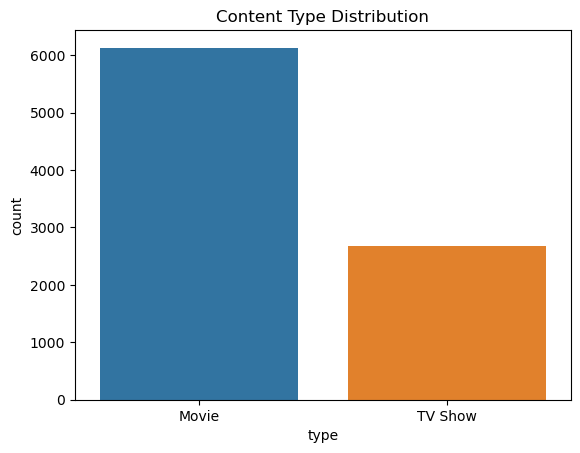

In [36]:
#Content Type Distribution
sns.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.show()


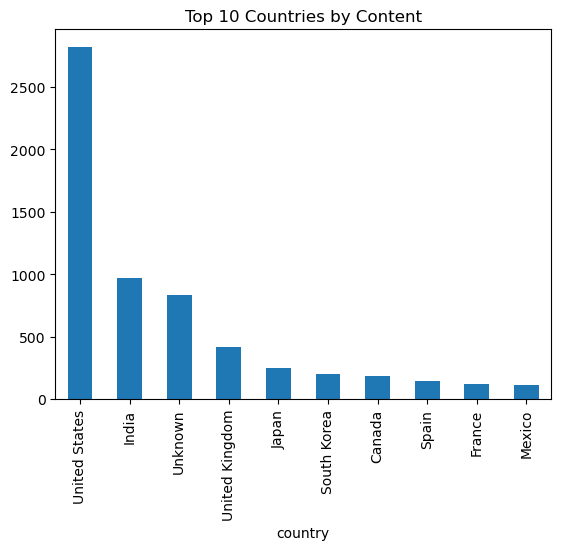

In [38]:
#Top 10 Countries by Content

top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Content')
plt.show()


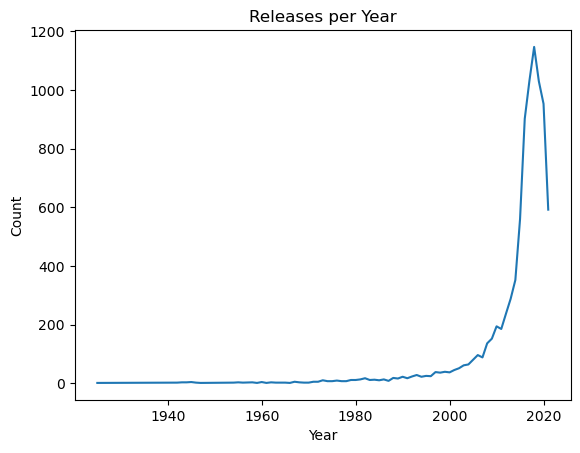

In [39]:
#Release Trend Over Years

df['release_year'].value_counts().sort_index().plot(kind='line', title='Releases per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


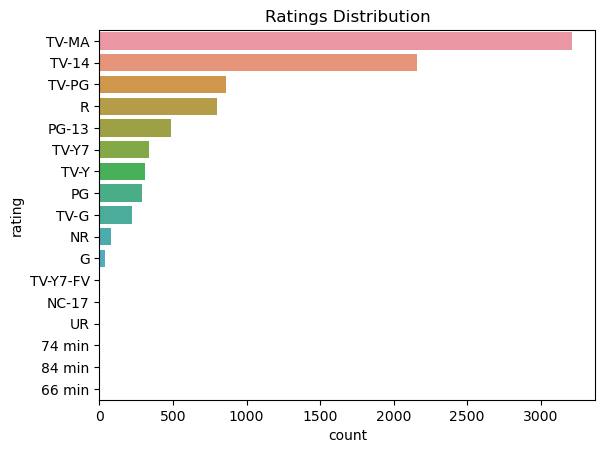

In [40]:
#Most Common Ratings

sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Ratings Distribution')
plt.show()


In [41]:
df.to_csv('cleaned_netflix_data.csv', index=False)

In [42]:
plt.savefig('release_trend.png')


<Figure size 640x480 with 0 Axes>